# Udemy Data Analysis

## Problem Statement

Udemy is on a mission to revolutionize online learning by enhancing sales performance and expanding course offerings strategically. Leveraging comprehensive data on course success rates, durations, and start-to-end years across multiple centers, Udemy aims to analyze revenue trends, popular courses, duration preferences, and other critical parameters.

## 1. Collection of Data

Performing ETL (Extract Transform Load)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('Udemy_data.xlsx')
df.head(10)

,Name of Institute,Trade/Course,Month (Batch Start),Year (Batch Start),Month (Batch End),Year (Batch End),User Id,Age,DOB
0,Centre A,Electronics Mechanic,9.0,2018,8.0,2020,USR-1,20,2003-04-14 00:00:00
1,Centre A,Electronics Mechanic,9.0,2018,8.0,2020,USR-2,18,2005-05-24 00:00:00
2,Centre A,Electronics Mechanic,9.0,2018,8.0,2020,USR-3,15,2008-03-16 00:00:00
3,Centre A,Electronics Mechanic,8.0,2018,8.0,2020,USR-4,21,2002-02-18 00:00:00
4,Centre A,Electronics Mechanic,8.0,2019,8.0,2020,USR-5,21,2002-10-03 00:00:00
5,Centre A,Electronics Mechanic,8.0,2019,8.0,2020,USR-6,18,2005-08-26 00:00:00
6,Centre A,Electronics Mechanic,8.0,2019,8.0,2020,USR-7,15,23432
7,Centre A,Electronics Mechanic,8.0,2019,8.0,2020,USR-8,16,2007-03-03 00:00:00
8,Centre A,Electronics Mechanic,8.0,2018,8.0,2020,USR-9,19,2004-07-05 00:00:00
9,Centre A,IoT Technician (Smart City),8.0,2019,8.0,2020,USR-10,21,2002-02-22 00:00:00


In [2]:
df.describe()

,Month (Batch Start),Year (Batch Start),Month (Batch End),Year (Batch End),Age
count,243.000000,500.000000,243.000000,500.000000,500.000000
mean,9.000000,2020.826000,8.246914,2022.340000,18.112000
std,2.299838,1.306575,1.235135,1.256805,1.910696
min,7.000000,2017.000000,7.000000,2019.000000,15.000000
25%,7.000000,2020.000000,8.000000,2021.000000,17.000000
50%,8.000000,2021.000000,8.000000,2023.000000,18.000000
75%,12.000000,2022.000000,8.000000,2023.000000,20.000000
max,12.000000,2022.000000,11.000000,2024.000000,21.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name of Institute    500 non-null    object 
 1   Trade/Course         500 non-null    object 
 2   Month (Batch Start)  243 non-null    float64
 3   Year (Batch Start)   500 non-null    int64  
 4   Month (Batch End)    243 non-null    float64
 5   Year (Batch End)     500 non-null    int64  
 6   User Id              500 non-null    object 
 7   Age                  500 non-null    int64  
 8   DOB                  500 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [110]:
for col in df.columns:
    print(col)

Name of Institute
Trade/Course
Month (Batch Start)
Year (Batch Start)
Month (Batch End)
Year (Batch End)
User Id
Age
DOB


In [111]:
print(df.isnull().sum())

Name of Institute        0
Trade/Course             0
Month (Batch Start)    257
Year (Batch Start)       0
Month (Batch End)      257
Year (Batch End)         0
User Id                  0
Age                      0
DOB                      0
dtype: int64


In [112]:
df = pd.read_excel('Udemy_data.xlsx')
df.tail(10)

,Name of Institute,Trade/Course,Month (Batch Start),Year (Batch Start),Month (Batch End),Year (Batch End),User Id,Age,DOB
490,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-491,20,2003-01-10 00:00:00
491,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-492,18,2005-02-11 00:00:00
492,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-493,20,2003-05-09 00:00:00
493,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-494,17,2006-06-14 00:00:00
494,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-495,17,2006-03-28 00:00:00
495,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-496,21,2002-11-25 00:00:00
496,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-497,20,6456
497,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-498,15,2008-07-20 00:00:00
498,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-499,16,2007-11-07 00:00:00
499,Centre E,Electronics Mechanic,NaN,2021,NaN,2023,USR-499,20,2003-12-03 00:00:00


In [113]:
df['Month (Batch Start)'] = pd.to_numeric(df['Month (Batch Start)'], errors='coerce')
df['Month (Batch Start)'] = df['Month (Batch Start)'].ffill()
if df['Month (Batch Start)'].isna().sum() == 0:
    df['Month (Batch Start)'] = df['Month (Batch Start)'].astype(int)
print(df['Month (Batch Start)'].dtype)
df[['Month (Batch Start)']].tail(10)

int32


,Month (Batch Start)
490,7
491,7
492,7
493,7
494,7
495,7
496,7
497,7
498,7
499,7


In [114]:
df['Month (Batch End)'] = pd.to_numeric(df['Month (Batch End)'], errors='coerce')
df['Month (Batch End)'] = df['Month (Batch End)'].ffill()
if df['Month (Batch End)'].isna().sum() == 0:
    df['Month (Batch End)'] = df['Month (Batch End)'].astype(int)
print(df['Month (Batch End)'].dtype)
df[['Month (Batch End)']].tail(10)

int32


,Month (Batch End)
490,8
491,8
492,8
493,8
494,8
495,8
496,8
497,8
498,8
499,8


In [115]:
print(df.isnull().sum())

Name of Institute      0
Trade/Course           0
Month (Batch Start)    0
Year (Batch Start)     0
Month (Batch End)      0
Year (Batch End)       0
User Id                0
Age                    0
DOB                    0
dtype: int64


In [116]:
df.head(10)

,Name of Institute,Trade/Course,Month (Batch Start),Year (Batch Start),Month (Batch End),Year (Batch End),User Id,Age,DOB
0,Centre A,Electronics Mechanic,9,2018,8,2020,USR-1,20,2003-04-14 00:00:00
1,Centre A,Electronics Mechanic,9,2018,8,2020,USR-2,18,2005-05-24 00:00:00
2,Centre A,Electronics Mechanic,9,2018,8,2020,USR-3,15,2008-03-16 00:00:00
3,Centre A,Electronics Mechanic,8,2018,8,2020,USR-4,21,2002-02-18 00:00:00
4,Centre A,Electronics Mechanic,8,2019,8,2020,USR-5,21,2002-10-03 00:00:00
5,Centre A,Electronics Mechanic,8,2019,8,2020,USR-6,18,2005-08-26 00:00:00
6,Centre A,Electronics Mechanic,8,2019,8,2020,USR-7,15,23432
7,Centre A,Electronics Mechanic,8,2019,8,2020,USR-8,16,2007-03-03 00:00:00
8,Centre A,Electronics Mechanic,8,2018,8,2020,USR-9,19,2004-07-05 00:00:00
9,Centre A,IoT Technician (Smart City),8,2019,8,2020,USR-10,21,2002-02-22 00:00:00


## 2. Exploratory Data Analysis

## 1. Number of Courses opted by Students

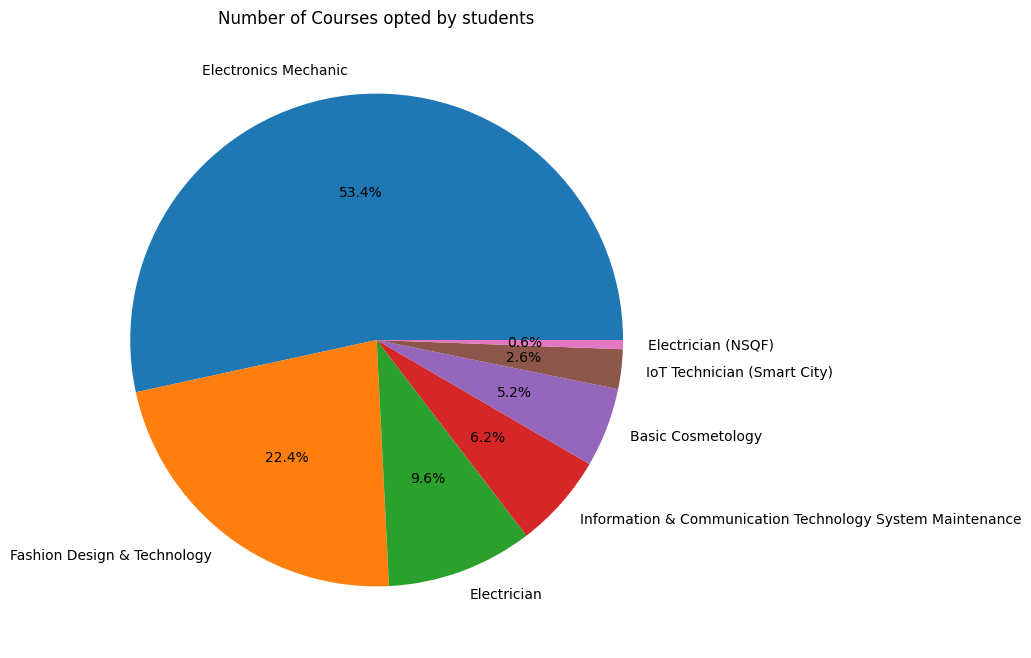

In [117]:
plt.figure(figsize = (8,8))
course_counts = df['Trade/Course'].value_counts()
plt.pie(course_counts, labels=course_counts.index, autopct='%1.1f%%')
plt.title('Number of Courses opted by students')
plt.show()

## Institute making higher Revenue

Here it can be concluded that Center A consist of highest Students followed by Center 2 and so on..

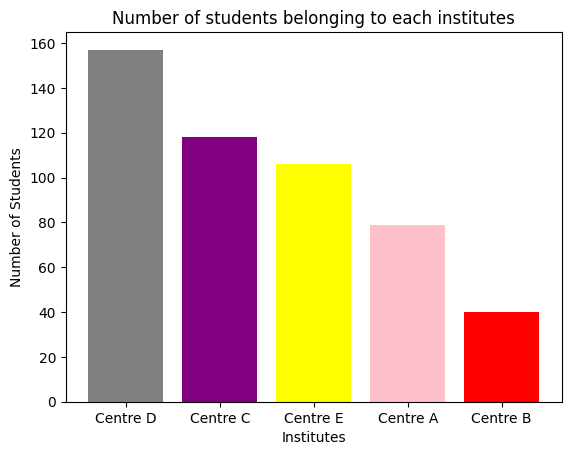

In [118]:
institute_count = df['Name of Institute'].value_counts()
color = ['grey', 'purple', 'yellow', 'pink', 'red']
plt.bar(institute_count.index, institute_count.values, color = color)
plt.xlabel('Institutes')
plt.ylabel('Number of Students')
plt.title('Number of students belonging to each institutes')
# plt.xticks(rotation=45)
plt.show()

## Revenue generated over years

The following chart draws conclusion that the revenue over years had shown immense growth specially fom years 2021 to 2022

Year (Batch Start)
2017      2
2018     18
2019     83
2020    100
2021     56
2022    241
Name: User Id, dtype: int64


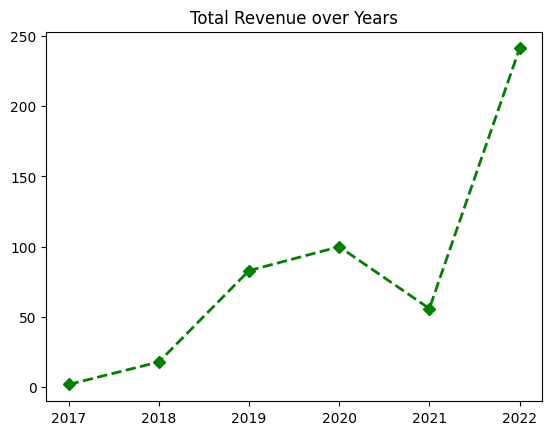

In [23]:
ax = df.groupby('Year (Batch Start)')['User Id'].count()
print(ax)
plt.plot(ax.index, ax.values, marker = 'D', linestyle = 'dashed', color = 'green', linewidth = 2)
plt.title('Total Revenue over Years')
plt.show()

## Average age of Students enrolled in each course

The plot helps to potray the range of ages of students enrolled in each course. The Red lien depicts Average Of Ages. It could be observed that there's no student exceeding the range (outliers).

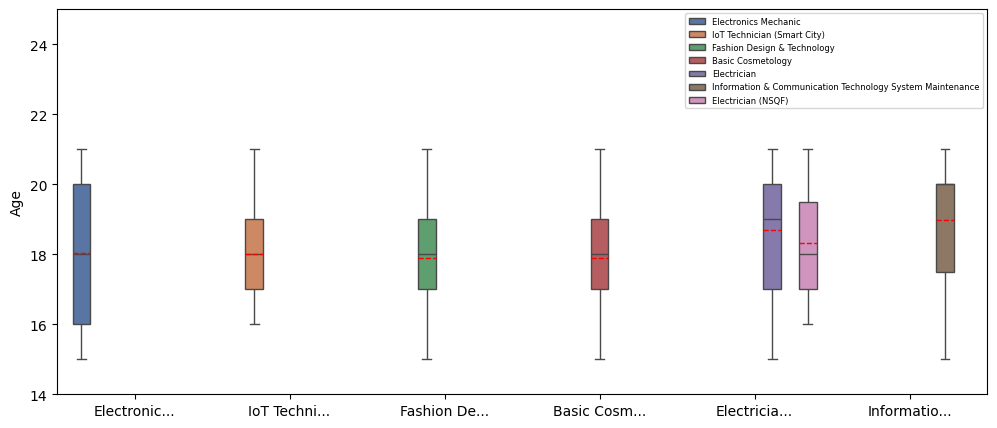

In [97]:
plt.figure(figsize = (12, 5))
lab = df['Trade/Course']
shorten = [labe[:10] + '...' for labe in lab]
plt.ylim(14, 25)
sns.boxplot(data = df, x = shorten, y = 'Age', patch_artist = True, showmeans = True, meanline = True, meanprops = dict(color = 'red'), palette = 'deep', hue = 'Trade/Course')
plt.legend(fontsize= 6)
plt.show()

# Average Duration of Each course

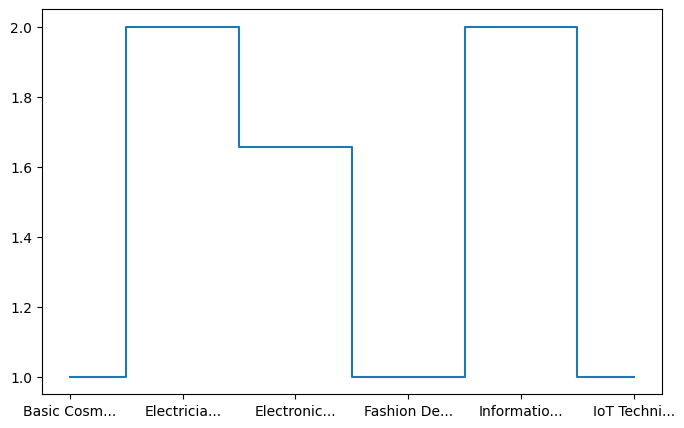

In [112]:
plt.figure(figsize = (8,5))
df['Duration'] = df['Year (Batch End)'] - df['Year (Batch Start)']
dur = df.groupby('Trade/Course')['Duration'].mean()
labels = dur.index
shortened_labels = [label[:10] + '...' for label in labels]
plt.step(shortened_labels, dur.values, where = 'mid')
plt.show()

## Maximum number of Courses opted among 6 years

In following chart widest curve tells us that maximum number of courses were opted on 2022 among all the years

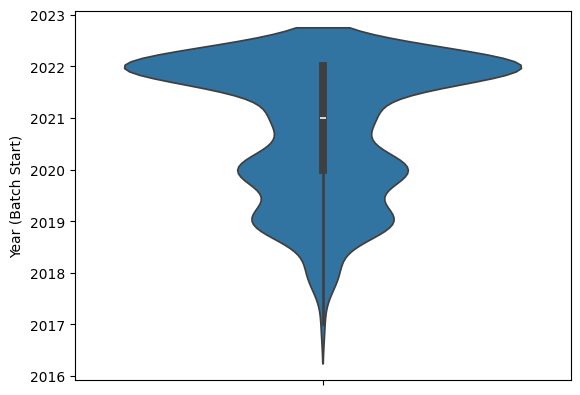

In [117]:
sns.violinplot(df['Year (Batch Start)'], label = 'Years')
plt.show()

## Distribution of Ages

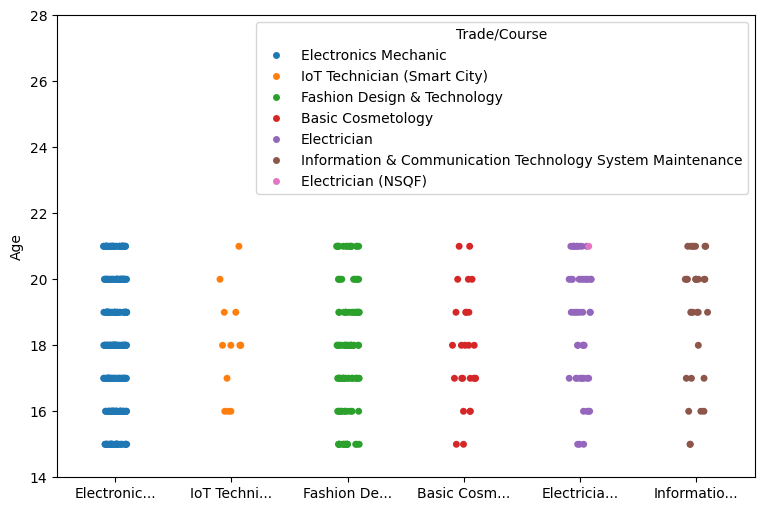

In [19]:
plt.figure(figsize = (9, 6))
lab = df['Trade/Course']
shorten = [labe[:10] + '...' for labe in lab]
plt.ylim(14,28)
sns.stripplot(data = df, x = shorten, y = 'Age', hue = 'Trade/Course')
plt.show()

From the above analysis it can be concluded that Revenue of the company have improved over years, flexible learning duration have attracted many learners however the improvements are necessary for the company to attract more students:

1. **Course Design for Wide Age Range**: Courses should be designed to appeal to a wider range of ages. Currently, enrollment seems to be concentrated within specific age groups. By offering courses that cater to a broader age demographic, the company can attract more learners and increase enrollment.

2. **Expansion of Offline Institutes**: Increasing the availability of offline institutes in different geographical regions will help reach a more diverse audience. Not everyone has access to online learning, and physical institutes can cater to those who prefer or require in-person education. This expansion can tap into untapped markets and increase the company's reach.

3. **Diversification of Course Offerings**: Offering a wide range of courses can attract more people with varied interests and career goals. Diversification can include adding new subjects, levels of expertise, or specialized courses to cater to different demographics and industries. This approach makes the company more inclusive and appealing to a larger audience.

Implementing these improvements can enhance the company's appeal, accessibility, and reach, leading to increased enrollment and success in attracting more students.